# **Vehicle Image Classification (3 wheeler or 4 wheeler)**
**by @https://github.com/Amruth-Sai-Mudivarthi**

In [1]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user


ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-scrip

In [2]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#assigning directory
directory=pathlib.Path("/content/drive/MyDrive/vehicleclassification")

In [37]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [42]:
image_count = 0
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".jpg"):
            image_count += 1
print(image_count)

200


In [50]:
#creating dictionary of flower species
flower_images_dict={
    "three":list(directory.glob('three*.jpg')),
    "four":list(directory.glob('four*.jpg'))

}

In [51]:
flower_images_dict

{'three': [PosixPath('/content/drive/MyDrive/vehicleclassification/three (9).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (10).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (5).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (7).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (1).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (6).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (3).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (4).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (2).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (8).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (18).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (15).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (11).jpg'),
  PosixPath(

In [52]:
#Different species list
keys=["three","four"]

In [53]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed


{'three': [PosixPath('/content/drive/MyDrive/vehicleclassification/three (9).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (10).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (5).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (7).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (1).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (6).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (3).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (4).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (2).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (8).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (18).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (15).jpg'),
  PosixPath('/content/drive/MyDrive/vehicleclassification/three (11).jpg'),
  PosixPath(

In [54]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [58]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=50)

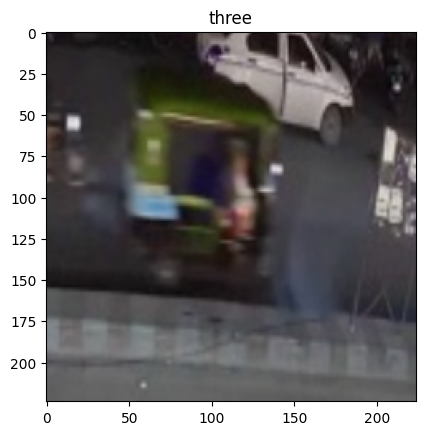

In [59]:
print_image(x_train[15],y_train[15])

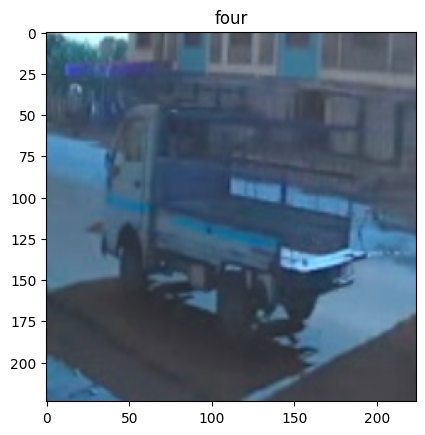

In [60]:
print_image(x_test[6],y_test[6])

In [61]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [62]:
x_train_scaled.shape

(150, 224, 224, 3)

In [63]:
y_train=np.array(y_train)
y_train.shape

(150,)

In [64]:
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(2,activation="softmax")])
model.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [65]:
model.fit(x_train_scaled,np.array(y_train),epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5005 - loss: 4.4127
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6340 - loss: 1.1687
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7443 - loss: 1.2777
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7615 - loss: 0.7635
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9339 - loss: 0.1775
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9153 - loss: 0.1870
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9628 - loss: 0.1078
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9651 - loss: 0.1134
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9965 - loss: 0.0737
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9978 - loss: 0.0582


In [66]:
model.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.9154 - loss: 0.4013


[0.3807585537433624, 0.9200000166893005]

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.models.Sequential([
    keras.layers.RandomZoom(0.3),  # Use keras.layers.RandomZoom directly
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(2, activation="softmax")
    # layers.Dense(2, kernel_regularizer=l2(0.01), activation="softmax")
])
model1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [70]:
model1.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4870 - loss: 14.6171
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4940 - loss: 10.2907
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5221 - loss: 6.5373
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6233 - loss: 2.3764
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7123 - loss: 0.7488


In [71]:
model1.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 702ms/step - accuracy: 0.8917 - loss: 0.3519


[0.3331013023853302, 0.8999999761581421]

#CNN Model with only Dropout layers

In [72]:
model2=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(2,activation="softmax")
])
model2.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [73]:
model2.fit(x_train_scaled,np.array(y_train),epochs=15)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4985 - loss: 3.6838
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5268 - loss: 6.0857
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5606 - loss: 4.0392
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6273 - loss: 2.8813
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7083 - loss: 1.2616
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.7191 - loss: 0.7219
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7362 - loss: 0.4912
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6832 - loss: 0.4880
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6980 - loss: 0.4645
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7800 - loss: 0.4098
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8542 - loss: 0.4196
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7973 - loss: 0.4043

In [74]:
model2.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8575 - loss: 0.3249 


[0.3220817446708679, 0.8799999952316284]

In [76]:
import tensorflow as tf

model3 = tf.keras.models.Sequential([
    tf.keras.layers.RandomZoom(0.3),  # Use tf.keras.layers.RandomZoom directly
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])
model3.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [77]:
model3.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6108 - loss: 3.6927
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6019 - loss: 3.0136
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6992 - loss: 2.1310
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6500 - loss: 1.8322
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8631 - loss: 0.4953


In [78]:
model3.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.8308 - loss: 0.2657


[0.25740286707878113, 0.8399999737739563]

#CNN Model with two different augumentation layers

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # Import layers from tf.keras.layers


model4 = keras.models.Sequential([
    layers.RandomZoom(0.3),  # Access RandomZoom directly from layers
    layers.RandomFlip(mode="horizontal_and_vertical"),  # Access RandomFlip directly from layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model4.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [81]:
model4.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5443 - loss: 13.6029
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5903 - loss: 4.2636
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6472 - loss: 1.3779
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8553 - loss: 0.3944
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9075 - loss: 0.3191


In [82]:
model4.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.7937 - loss: 0.6877


[0.6704151034355164, 0.800000011920929]

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Remove 'experimental.preprocessing' from RandomZoom import
model5 = keras.models.Sequential([
    layers.RandomZoom(0.3),  # Use RandomZoom directly from layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(2, activation="softmax")
])
model5.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [85]:
model5.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5491 - loss: 9.2967
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4387 - loss: 1.9408
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7930 - loss: 0.4540
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8593 - loss: 0.3109
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8701 - loss: 0.3567


In [86]:
model5.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8783 - loss: 0.1991


[0.20011672377586365, 0.8799999952316284]

In [87]:
myCNN=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(2,activation="softmax")
])
myCNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [88]:
myCNN.fit(x_train_scaled,np.array(y_train),epochs=5)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5859 - loss: 4.9417
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.7199 - loss: 0.6078
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.8230 - loss: 0.4266
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8728 - loss: 0.3032
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9116 - loss: 0.1494


In [89]:
myCNN.evaluate(x_test_scaled,np.array(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.8546 - loss: 0.4929


[0.4864157736301422, 0.8600000143051147]